In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [6]:
df = pd.read_csv('../input/amazon-music-reviews/Musical_instruments_reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(10261, 9)
(500, 9)


In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


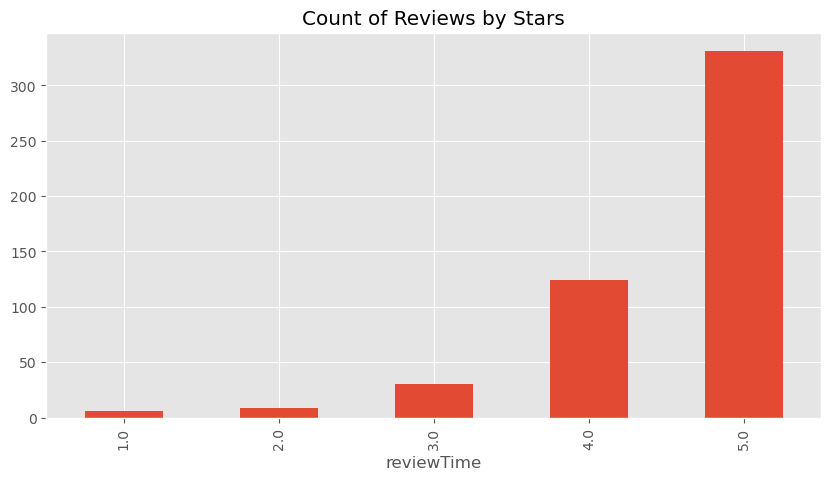

In [17]:
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('reviewTime')
plt.show()

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [29]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['reviewerID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [35]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewerID'})
vaders = vaders.merge(df, how='left')

In [36]:
vaders

,reviewerID,neg,neu,pos,compound,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,0.057,0.790,0.153,0.6903,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,0.023,0.759,0.218,0.9544,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A14VAT5EAX3D9S,0.023,0.759,0.218,0.9544,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5.0,Great,1364860800,"04 2, 2013"
3,A195EZSQDW3E21,0.113,0.858,0.029,-0.7003,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
4,A2C00NNG1ZQQG2,0.055,0.746,0.199,0.5859,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A24VMSBJAWFRCP,0.000,0.829,0.171,0.9599,B0002CZVK0,Shawn,"[0, 0]",Some things just don't need to change. Some Wa...,5.0,It's a classic for a reason.,1397088000,"04 10, 2014"
496,A39TYRIZLTCK9P,0.000,0.752,0.248,0.7845,B0002CZVW8,mike ceely,"[0, 0]",does what is designed to do easy to use seems ...,4.0,good buy,1370044800,"06 1, 2013"
497,AJGD0VSCUJUP5,0.049,0.951,0.000,-0.2960,B0002CZVW8,Squidsmom,"[0, 0]",This capo does exactly what it should. It cla...,5.0,Never can go wrong with Kyser,1381968000,"10 17, 2013"
498,A3C9F3SZWLWDZF,0.000,0.864,0.136,0.6249,B0002CZVWS,B. Benamati,"[0, 0]","works great, stays out of the way... cant ask ...",5.0,Its a Capo.,1375401600,"08 2, 2013"


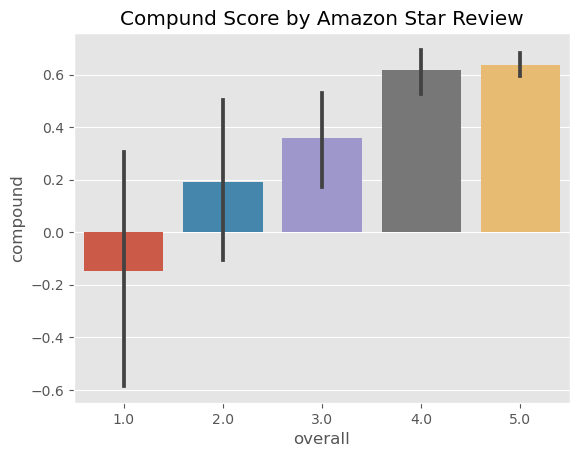

In [37]:
ax = sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

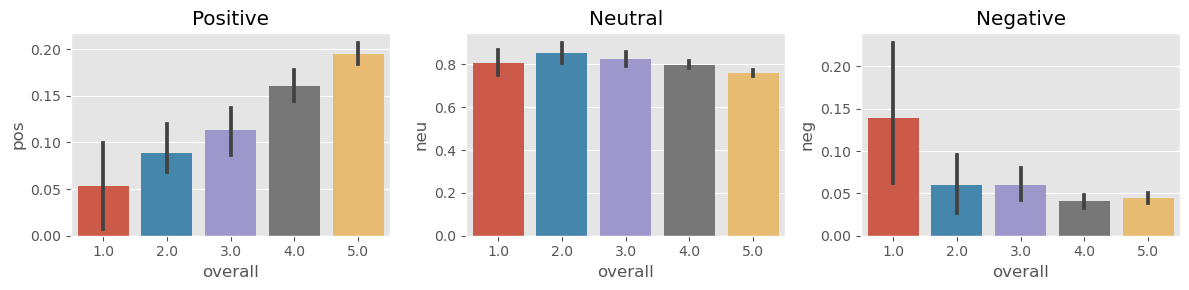

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()